In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, balanced_accuracy_score
import matplotlib
matplotlib.use('agg')
import pylab as plt
import seaborn as sn
import pandas as pd
import pickle
import scikitplot as skplt

%matplotlib inline

In [21]:
# DATASET = '/home/researcher/Desktop/projects/rfsensing/UIST/UIST/all'
DATASET = '/home/researcher/PycharmProjects/RI4DPC/data/pantomime_f_32_p_32'
# MODEL = 'gesturenet_sparse'
MODEL = 'modified_edgecnn_1608893997'

with open('{}/scores_{}.pkl'.format(DATASET, MODEL), 'rb') as handle:
    scores = pickle.load(handle)
total_y_true = scores['total_y_true']
total_y_pred = scores['total_y_pred']
SHAPE_NAMES = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
               'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
               'u']
total_y_score = scores['total_y_score']
print(total_y_score[0])

[-2.2144762e+01 -1.8035845e+01 -2.2340096e+01 -2.6832657e+01
 -2.2009811e+01 -2.7778599e+01 -3.3924015e+01 -1.7293262e+01
 -1.9318731e+01 -2.0061552e+01 -2.2286526e+01 -2.4816446e+01
 -2.0137787e+01 -1.7402266e+01 -1.1920922e-06 -3.3777908e+01
 -2.4130758e+01 -1.3739655e+01 -2.9011496e+01 -2.4467623e+01
 -1.7822104e+01]


In [22]:
# Convert score to probability
for index, score in enumerate(total_y_score):
    total_y_score[index] = np.exp(score)/np.sum(np.exp(score))

The confusion matrix has been saved!
Metrics:
Balanced Accuracy: 0.9502645502645501
Recall=> macro: 0.9502645502645501, micro: 0.9511363636363637, weighted: 0.9511363636363637
Precision=> macro: 0.9588996222613301, micro: 0.9511363636363637, weighted: 0.959394738240688
F1=> macro: 0.9520716469058489, micro: 0.9511363636363637, weighted: 0.9527815259367042
ROC AUC=> ovr: 0.9772114465796298, ovo: 0.9771794670414462


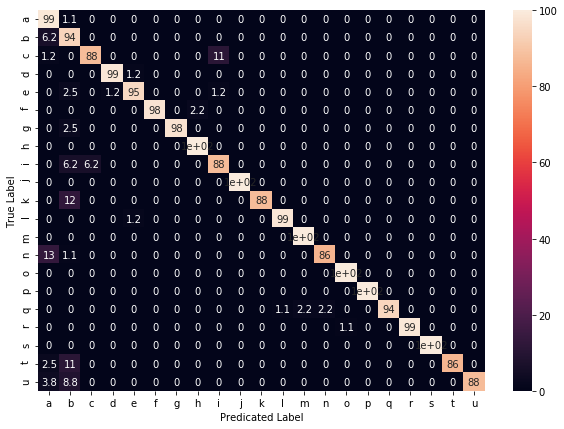

In [23]:
total_y_true_label = []
total_y_pred_label = []
for index, y_true in enumerate(total_y_true):
    total_y_true_label.append(SHAPE_NAMES[int(y_true)])
for index, y_pred in enumerate(total_y_pred):
    total_y_pred_label.append(SHAPE_NAMES[int(y_pred)])
cm = confusion_matrix(total_y_true_label, total_y_pred_label, SHAPE_NAMES)
cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100

df_cm = pd.DataFrame(cm, index = SHAPE_NAMES,
              columns = SHAPE_NAMES)
plt.figure(figsize = (10,7))
plot = sn.heatmap(df_cm, annot=True)
figure = plot.get_figure()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
figure.savefig('{}/cf_{}.png'.format(DATASET, MODEL), dpi=400)

balanced_accuracy = balanced_accuracy_score(total_y_true, total_y_pred)
macro_f1 = f1_score(total_y_true, total_y_pred, average='macro')
micro_f1 = f1_score(total_y_true, total_y_pred, average='micro')
weighted_f1 = f1_score(total_y_true, total_y_pred, average='weighted')
macro_precision = precision_score(total_y_true, total_y_pred, average='macro')
micro_precision = precision_score(total_y_true, total_y_pred, average='micro')
weighted_precision = precision_score(total_y_true, total_y_pred, average='weighted')
macro_recall = recall_score(total_y_true, total_y_pred, average='macro')
micro_recall = recall_score(total_y_true, total_y_pred, average='micro')
weighted_recall = recall_score(total_y_true, total_y_pred, average='weighted')
ovr_auc_score = roc_auc_score(total_y_true, total_y_score, multi_class='ovr')
ovo_auc_score = roc_auc_score(total_y_true, total_y_score, multi_class='ovo')
print('The confusion matrix has been saved!')
print('Metrics:')
print('Balanced Accuracy: {}'.format(balanced_accuracy))
print('Recall=> macro: {}, micro: {}, weighted: {}'.format(macro_recall, micro_recall, weighted_recall))
print('Precision=> macro: {}, micro: {}, weighted: {}'.format(macro_precision, micro_precision, weighted_precision))
print('F1=> macro: {}, micro: {}, weighted: {}'.format(macro_f1, micro_f1, weighted_f1))
print('ROC AUC=> ovr: {}, ovo: {}'.format(ovr_auc_score, ovo_auc_score))

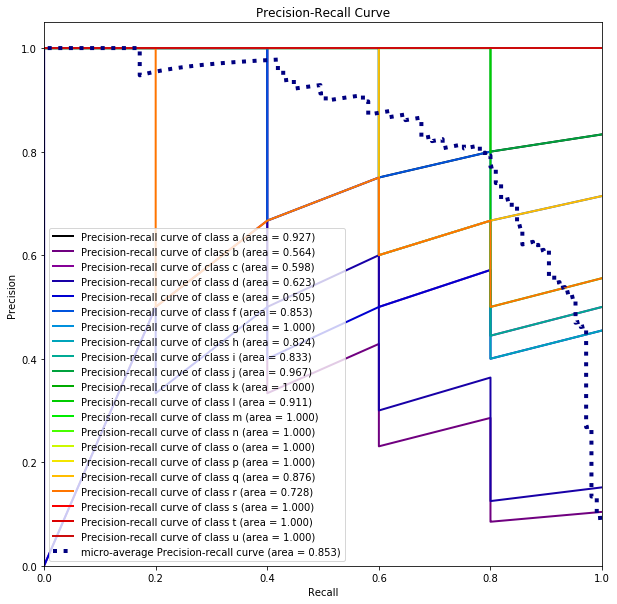

In [89]:
skplt.metrics.plot_precision_recall(total_y_true_label, total_y_score, figsize=(10, 10))
plt.show()

In [68]:
total_y_true

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8

In [104]:
print(total_y_pred[101])
print(total_y_true[101])

5.0
5.0


In [94]:
total_y_score[38]

array([9.45582371e-04, 1.56318253e-01, 2.21042733e-04, 5.98212038e-05,
       1.77297277e-06, 5.16468150e-05, 5.79705771e-07, 6.65902006e-06,
       1.82394597e-07, 1.79600020e-02, 2.53651844e-05, 1.99467154e-05,
       6.71848924e-10, 6.81863031e-10, 2.25790712e-09, 5.80496923e-05,
       2.07345575e-06, 1.47095465e-04, 8.23902651e-01, 1.39198127e-07,
       1.76739582e-07, 5.62666924e-07, 2.62507758e-04, 1.53359377e-05,
       5.51031975e-07])

In [26]:
total_l2_indices = np.array(scores['total_l2_indices'])
total_l2_xyz = np.array(scores['total_l2_xyz'])
total_l2_points_before_pooling = np.array(scores['total_l2_points_before_pooling'])

In [124]:
total_l2_indices[0][0][0]

array([  0,   4,   6,   7,  10,  13,  15,  16,  17,  18,  19,  20,  21,
        24,  27,  29,  30,  31,  34,  36,  37,  38,  39,  41,  42,  43,
        45,  48,  49,  50,  52,  54,  55,  57,  58,  60,  61,  62,  63,
        64,  68,  69,  70,  72,  73,  77,  78,  79,  80,  81,  82,  83,
        85,  86,  88,  89,  91,  92,  93,  94,  95,  97,  99, 102],
      dtype=int32)

In [28]:
total_l2_xyz.shape

(16, 8, 128, 3)

In [51]:
total_l2_points_before_pooling.shape

(16, 8, 128, 64, 256)

In [132]:
normalized_activations = []
for gesture in range(16):
    normalized_activations.append([])
    for f in range(8):
        activations = []
        for i in range(128):
            activations.append(np.amax(total_l2_points_before_pooling[gesture][0][i]))
        normalized_activations[-1].append((activations - min(activations)) / (max(activations) - min(activations)))
normalized_activations = np.array(normalized_activations)

In [133]:
normalized_activations.shape

(16, 8, 128)

In [36]:
def calculate_average_for_a_speed(distance, speed, users, angles):
    file_path_template = '/home/researcher/Desktop/projects/rfsensing/pantomime/angle_results/{distance}_{angle}_{speed}_{user}'
    accuracies = []
    aucs = []
    for user in users:
        for angle in angles:
            file_path = file_path_template.format(distance=distance, speed=speed, user=user, angle=angle)
            with open('{}/scores_{}.pkl'.format(file_path, MODEL), 'rb') as handle:
                scores = pickle.load(handle)
            total_y_true = scores['total_y_true']
            total_y_pred = scores['total_y_pred']
            SHAPE_NAMES = scores['SHAPE_NAMES']
            total_y_score = scores['total_y_score']
            for index, score in enumerate(total_y_score):
                total_y_score[index] = np.exp(score)/np.sum(np.exp(score))
            total_y_true_label = []
            total_y_pred_label = []
            for index, y_true in enumerate(total_y_true):
                total_y_true_label.append(SHAPE_NAMES[int(y_true)])
            for index, y_pred in enumerate(total_y_pred):
                total_y_pred_label.append(SHAPE_NAMES[int(y_pred)])
            balanced_accuracy = balanced_accuracy_score(total_y_true, total_y_pred)
            ovr_auc_score = roc_auc_score(total_y_true, total_y_score, multi_class='ovr')
            accuracies.append(balanced_accuracy)
            aucs.append(ovr_auc_score)
    print('mean accuracy:', np.mean(accuracies))
    print('mean auc:', np.mean(aucs))
    print('std accuracy:', np.std(accuracies))
    print('std auc:', np.std(aucs))
calculate_average_for_a_speed(1, 'fast', [1, 2], [-45, -30, -15, 0, 15, 30, 45])

mean accuracy: 0.8727891156462587
mean auc: 0.989
std accuracy: 0.1365789209824016
std auc: 0.023730392311851402


In [11]:
def calculate_average_for_an_angle(distance, angle, speeds, users):
    file_path_template = '/home/researcher/Desktop/projects/rfsensing/pantomime/angle_results/{distance}_{angle}_{speed}_{user}'
    accuracies = []
    aucs = []
    for user in users:
        for speed in speeds:
            file_path = file_path_template.format(distance=distance, speed=speed, user=user, angle=angle)
            with open('{}/scores_{}.pkl'.format(file_path, MODEL), 'rb') as handle:
                scores = pickle.load(handle)
            total_y_true = scores['total_y_true']
            total_y_pred = scores['total_y_pred']
            SHAPE_NAMES = scores['SHAPE_NAMES']
            total_y_score = scores['total_y_score']
            for index, score in enumerate(total_y_score):
                total_y_score[index] = np.exp(score)/np.sum(np.exp(score))
            total_y_true_label = []
            total_y_pred_label = []
            for index, y_true in enumerate(total_y_true):
                total_y_true_label.append(SHAPE_NAMES[int(y_true)])
            for index, y_pred in enumerate(total_y_pred):
                total_y_pred_label.append(SHAPE_NAMES[int(y_pred)])
            balanced_accuracy = balanced_accuracy_score(total_y_true, total_y_pred)
            ovr_auc_score = roc_auc_score(total_y_true, total_y_score, multi_class='ovr')
            accuracies.append(balanced_accuracy)
            aucs.append(ovr_auc_score)
    print('mean accuracy:', np.mean(accuracies))
    print('mean auc:', np.mean(aucs))
    print('std accuracy:', np.std(accuracies))
    print('std auc:', np.std(aucs))
    print(accuracies)
calculate_average_for_an_angle(1, 0, ['fast'], [1, 2])

mean accuracy: 0.9809523809523809
mean auc: 1.0
std accuracy: 0.009523809523809601
std auc: 0.0
[0.9714285714285713, 0.9904761904761905]
